In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_pickle('../../Base de datos/nocategorical.pkl')
df

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_210,feature_211,feature_212,feature_213,feature_214,feature_215,feature_216,feature_217,feature_218,target
0,0.554222,1.0,0.0,0.000000,0.398189,0.000000,0.190514,0.774141,0.004995,0.666667,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.0,1
1,0.521013,0.5,0.0,NaN,0.299222,0.000649,0.000000,0.827157,0.000668,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.0,1
2,0.545612,1.0,0.0,0.000102,0.248790,0.000000,0.571429,0.851531,0.000604,0.000000,...,0.206293,0.022686,0.000562,0.50000,0.116689,0.566809,0.020597,0.020891,1.0,1
3,0.593774,0.5,0.0,0.000000,0.412052,0.001299,0.087886,0.559571,0.002227,0.333333,...,0.026009,0.074658,0.003375,1.00000,0.025595,0.097360,0.020597,0.002580,0.0,1
4,0.278900,0.0,0.0,0.000000,0.160199,0.009740,0.134400,0.841197,0.000700,0.833333,...,0.049540,0.064444,0.003375,0.85715,0.032973,0.131737,0.020597,0.002613,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472417,0.423788,0.0,0.0,0.000000,0.485636,0.018182,0.285714,0.792730,0.004645,0.333333,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.0,1
472418,0.539659,0.5,0.0,0.000105,0.158255,0.005844,0.114286,0.517002,0.002545,0.500000,...,0.112360,0.020824,0.004499,0.85000,0.042598,0.189578,0.020597,0.003336,1.0,1
472419,0.435566,0.5,0.0,0.000164,0.423629,0.003247,0.142857,0.801128,0.000859,0.666667,...,0.064070,0.030698,0.016873,0.92645,0.031424,0.202529,0.020597,0.004713,0.0,1
472420,0.395057,0.5,0.0,0.000000,0.340654,0.010390,0.285714,0.731666,0.000700,0.000000,...,0.039394,0.112085,0.000562,0.50000,0.040467,0.101130,0.112085,0.001517,1.0,1


# Quitamos valores NaN

In [4]:
# Contar la cantidad de cada valor único en la columna 'Target'
value_counts = df['target'].value_counts()

# Calcular la proporción entre los valores 0 y 1
proportion = value_counts[0] / value_counts[1]
proportion

0.16372710342992836

In [3]:
df_dropped_all = df.dropna()
df_dropped_all

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_210,feature_211,feature_212,feature_213,feature_214,feature_215,feature_216,feature_217,feature_218,target
3,0.593774,0.5,0.0,0.000000,0.412052,0.001299,0.087886,0.559571,0.002227,0.333333,...,0.026009,0.074658,0.003375,1.00000,0.025595,0.097360,0.020597,0.002580,0.0,1
6,0.455957,1.0,0.0,0.000018,0.272786,0.014286,0.571429,0.796988,0.001050,0.500000,...,0.176415,0.238134,0.005062,0.80770,0.043148,0.229013,0.199603,0.004473,0.0,1
7,0.675143,1.0,0.0,0.000259,0.331525,0.040909,0.571429,0.880024,0.000923,0.750000,...,0.211176,0.106760,0.001125,0.75000,0.122571,0.217953,0.106760,0.005346,0.0,1
10,0.420651,0.5,0.0,0.000120,0.658876,0.005844,0.263771,0.703912,0.001273,0.333333,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,1
11,0.517382,0.5,0.0,0.000164,0.234664,0.017532,0.571429,0.817447,0.000032,1.000000,...,0.203932,0.020992,0.000562,0.50000,0.100911,0.265197,0.020597,0.005515,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467454,0.602052,0.5,0.0,0.000000,0.308753,0.070779,0.285714,0.859670,0.000859,0.500000,...,0.085892,0.022177,0.002812,0.75000,0.050887,0.237017,0.020597,0.006062,0.0,1
467457,0.488040,1.0,0.0,0.000163,0.387654,0.000000,0.163314,0.853657,0.000064,1.000000,...,0.135308,0.069309,0.001687,0.60000,0.074664,0.351867,0.069309,0.006433,0.0,1
467459,0.443471,0.5,0.0,0.000125,0.436325,0.000000,0.380914,0.451087,0.001273,0.333333,...,0.113105,0.116021,0.014623,0.90325,0.033008,0.240204,0.045383,0.004853,0.0,1
467461,0.560547,0.5,0.0,0.000078,0.252033,0.035714,0.000000,0.704945,0.002195,0.666667,...,0.199900,0.119463,0.001125,0.66665,0.092646,0.226892,0.020597,0.006386,0.0,1


In [5]:
# Contar la cantidad de cada valor único en la columna 'Target'
value_counts = df_dropped_all['target'].value_counts()

# Calcular la proporción entre los valores 0 y 1
proportion = value_counts[0] / value_counts[1]
proportion

0.16056078751540553

# Analisis de colinealidad

In [17]:
correlation_matrix = df_dropped_all.corr().abs()

In [7]:
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

In [10]:
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]
len(to_drop)

39

In [13]:
df_dropped = df_dropped_all.drop(df_dropped_all[to_drop], axis=1)

In [14]:
df_dropped

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_210,feature_211,feature_212,feature_213,feature_214,feature_215,feature_216,feature_217,feature_218,target
3,0.593774,0.5,0.0,0.000000,0.412052,0.001299,0.087886,0.559571,0.002227,0.333333,...,0.026009,0.074658,0.003375,1.00000,0.025595,0.097360,0.020597,0.002580,0.0,1
6,0.455957,1.0,0.0,0.000018,0.272786,0.014286,0.571429,0.796988,0.001050,0.500000,...,0.176415,0.238134,0.005062,0.80770,0.043148,0.229013,0.199603,0.004473,0.0,1
7,0.675143,1.0,0.0,0.000259,0.331525,0.040909,0.571429,0.880024,0.000923,0.750000,...,0.211176,0.106760,0.001125,0.75000,0.122571,0.217953,0.106760,0.005346,0.0,1
10,0.420651,0.5,0.0,0.000120,0.658876,0.005844,0.263771,0.703912,0.001273,0.333333,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,1
11,0.517382,0.5,0.0,0.000164,0.234664,0.017532,0.571429,0.817447,0.000032,1.000000,...,0.203932,0.020992,0.000562,0.50000,0.100911,0.265197,0.020597,0.005515,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467454,0.602052,0.5,0.0,0.000000,0.308753,0.070779,0.285714,0.859670,0.000859,0.500000,...,0.085892,0.022177,0.002812,0.75000,0.050887,0.237017,0.020597,0.006062,0.0,1
467457,0.488040,1.0,0.0,0.000163,0.387654,0.000000,0.163314,0.853657,0.000064,1.000000,...,0.135308,0.069309,0.001687,0.60000,0.074664,0.351867,0.069309,0.006433,0.0,1
467459,0.443471,0.5,0.0,0.000125,0.436325,0.000000,0.380914,0.451087,0.001273,0.333333,...,0.113105,0.116021,0.014623,0.90325,0.033008,0.240204,0.045383,0.004853,0.0,1
467461,0.560547,0.5,0.0,0.000078,0.252033,0.035714,0.000000,0.704945,0.002195,0.666667,...,0.199900,0.119463,0.001125,0.66665,0.092646,0.226892,0.020597,0.006386,0.0,1


# Información Mutua

In [20]:
# Seleccionar todas las columnas excepto 'target' como X
X = df_dropped.drop('target', axis=1)

# Seleccionar la columna 'target' como y
y = df_dropped['target']

In [22]:
from sklearn.feature_selection import mutual_info_regression

# Calcula la información mutua
mi = mutual_info_regression(X, y)

# Asocia cada valor de MI con su columna correspondiente
mi_scores = pd.Series(mi, index=X.columns)

# Ordena los scores
mi_scores = mi_scores.sort_values(ascending=False)

# Muestra o guarda los scores
print(mi_scores)

feature_122    0.014994
feature_68     0.005720
feature_164    0.005372
feature_70     0.004587
feature_36     0.004270
                 ...   
feature_98     0.000000
feature_91     0.000000
feature_87     0.000000
feature_85     0.000000
feature_102    0.000000
Length: 179, dtype: float64


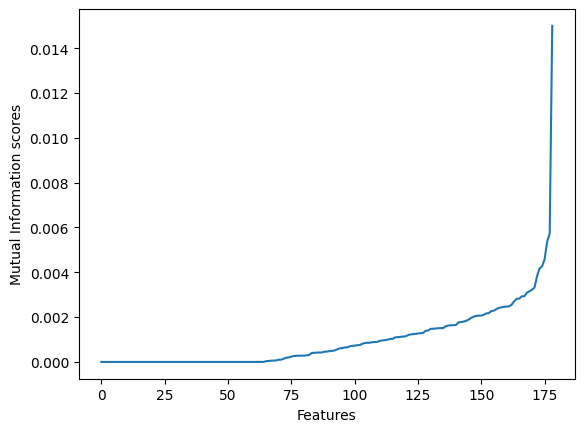

In [26]:
sorted_scores = np.sort(mi_scores)
plt.plot(sorted_scores)
plt.xlabel('Features')
plt.ylabel('Mutual Information scores')
plt.show()

# Factor de inflación de la varianza (VIF)

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calcula VIF para cada variable predictora
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

         feature        VIF
0      feature_1  23.692045
1      feature_2   8.763251
2      feature_3   1.310267
3      feature_4   1.006753
4      feature_5   8.677744
..           ...        ...
174  feature_214  10.946313
175  feature_215  26.323920
176  feature_216   4.879125
177  feature_217   1.571877
178  feature_218   2.964195

[179 rows x 2 columns]


In [30]:
vif_data_sorted = vif_data.sort_values(by="VIF", ascending=False)
print(vif_data_sorted)

         feature          VIF
139  feature_161  7631.129406
163  feature_202  5306.806788
161  feature_200  5225.810862
160  feature_199  4284.000453
166  feature_205  2890.894052
..           ...          ...
3      feature_4     1.006753
11    feature_13     1.006380
94   feature_107     1.005349
130  feature_150     1.003855
106  feature_121     1.000565

[179 rows x 2 columns]


In [31]:
# Encuentra las características con VIF mayor a 10
features_to_drop = vif_data[vif_data['VIF'] > 10]['feature']

# Elimina esas características del DataFrame original X
X_reduced = X.drop(columns=features_to_drop)

In [32]:
X_reduced

,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_9,feature_12,feature_13,feature_14,...,feature_197,feature_201,feature_204,feature_207,feature_208,feature_211,feature_212,feature_216,feature_217,feature_218
3,0.5,0.0,0.000000,0.412052,0.001299,0.087886,0.002227,0.000113,0.0,0.000011,...,0.034483,0.042598,0.012136,0.013420,0.026187,0.074658,0.003375,0.020597,0.002580,0.0
6,1.0,0.0,0.000018,0.272786,0.014286,0.571429,0.001050,0.000113,0.0,0.000046,...,0.022989,0.042971,0.001849,0.011287,0.029193,0.238134,0.005062,0.199603,0.004473,0.0
7,1.0,0.0,0.000259,0.331525,0.040909,0.571429,0.000923,0.000845,0.0,0.001890,...,0.017241,0.056945,0.008079,0.000320,0.216927,0.106760,0.001125,0.106760,0.005346,0.0
10,0.5,0.0,0.000120,0.658876,0.005844,0.263771,0.001273,0.000225,0.0,0.000046,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
11,0.5,0.0,0.000164,0.234664,0.017532,0.571429,0.000032,0.000056,0.0,0.000011,...,0.022989,0.065277,0.009147,0.008748,0.209485,0.020992,0.000562,0.020597,0.005515,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467454,0.5,0.0,0.000000,0.308753,0.070779,0.285714,0.000859,0.000056,0.0,0.000011,...,0.051724,0.034712,0.010139,0.085771,0.069349,0.022177,0.002812,0.020597,0.006062,0.0
467457,1.0,0.0,0.000163,0.387654,0.000000,0.163314,0.000064,0.000113,0.0,0.000023,...,0.063218,0.032673,0.004626,0.001302,0.057865,0.069309,0.001687,0.069309,0.006433,0.0
467459,0.5,0.0,0.000125,0.436325,0.000000,0.380914,0.001273,0.000169,0.0,0.000046,...,0.183908,0.033275,0.001822,0.000768,0.024046,0.116021,0.014623,0.045383,0.004853,0.0
467461,0.5,0.0,0.000078,0.252033,0.035714,0.000000,0.002195,0.000056,0.0,0.000023,...,0.022989,0.046901,0.017513,0.012908,0.205344,0.119463,0.001125,0.020597,0.006386,0.0


In [35]:
# Calcula VIF para cada variable predictora
vif_data1 = pd.DataFrame()
vif_data1["feature"] = X_reduced.columns
vif_data1["VIF"] = [variance_inflation_factor(X_reduced.values, i) for i in range(len(X_reduced.columns))]

print(vif_data1)

         feature       VIF
0      feature_2  4.971133
1      feature_3  1.232799
2      feature_4  1.006527
3      feature_5  8.287840
4      feature_6  1.824740
..           ...       ...
124  feature_211  6.254247
125  feature_212  1.337138
126  feature_216  4.536580
127  feature_217  1.219807
128  feature_218  2.909960

[129 rows x 2 columns]


In [36]:
vif_data_sorted1 = vif_data1.sort_values(by="VIF", ascending=False)
print(vif_data_sorted1)

        feature       VIF
3     feature_5  8.287840
77  feature_124  7.968988
22   feature_41  7.779893
80  feature_127  7.723668
48   feature_79  7.282459
..          ...       ...
2     feature_4  1.006527
67  feature_107  1.005168
8    feature_13  1.004207
97  feature_150  1.003546
75  feature_121  1.000405

[129 rows x 2 columns]


In [38]:
# Encuentra las características con VIF mayor a 10
features_to_drop1 = vif_data1[vif_data1['VIF'] > 6]['feature']

# Elimina esas características del DataFrame original X
X_reduced1 = X_reduced.drop(columns=features_to_drop1)

In [39]:
X_reduced1

,feature_2,feature_3,feature_4,feature_6,feature_7,feature_9,feature_12,feature_13,feature_14,feature_15,...,feature_195,feature_197,feature_201,feature_204,feature_207,feature_208,feature_212,feature_216,feature_217,feature_218
3,0.5,0.0,0.000000,0.001299,0.087886,0.002227,0.000113,0.0,0.000011,0.013514,...,1,0.034483,0.042598,0.012136,0.013420,0.026187,0.003375,0.020597,0.002580,0.0
6,1.0,0.0,0.000018,0.014286,0.571429,0.001050,0.000113,0.0,0.000046,0.114286,...,2,0.022989,0.042971,0.001849,0.011287,0.029193,0.005062,0.199603,0.004473,0.0
7,1.0,0.0,0.000259,0.040909,0.571429,0.000923,0.000845,0.0,0.001890,0.877660,...,2,0.017241,0.056945,0.008079,0.000320,0.216927,0.001125,0.106760,0.005346,0.0
10,0.5,0.0,0.000120,0.005844,0.263771,0.001273,0.000225,0.0,0.000046,0.100000,...,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
11,0.5,0.0,0.000164,0.017532,0.571429,0.000032,0.000056,0.0,0.000011,1.000000,...,1,0.022989,0.065277,0.009147,0.008748,0.209485,0.000562,0.020597,0.005515,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467454,0.5,0.0,0.000000,0.070779,0.285714,0.000859,0.000056,0.0,0.000011,0.037037,...,1,0.051724,0.034712,0.010139,0.085771,0.069349,0.002812,0.020597,0.006062,0.0
467457,1.0,0.0,0.000163,0.000000,0.163314,0.000064,0.000113,0.0,0.000023,1.000000,...,2,0.063218,0.032673,0.004626,0.001302,0.057865,0.001687,0.069309,0.006433,0.0
467459,0.5,0.0,0.000125,0.000000,0.380914,0.001273,0.000169,0.0,0.000046,0.100000,...,2,0.183908,0.033275,0.001822,0.000768,0.024046,0.014623,0.045383,0.004853,0.0
467461,0.5,0.0,0.000078,0.035714,0.000000,0.002195,0.000056,0.0,0.000023,0.028986,...,1,0.022989,0.046901,0.017513,0.012908,0.205344,0.001125,0.020597,0.006386,0.0


In [40]:
df_totally_reduced = pd.concat([X_reduced1, y], axis=1)


In [41]:
df_totally_reduced

,feature_2,feature_3,feature_4,feature_6,feature_7,feature_9,feature_12,feature_13,feature_14,feature_15,...,feature_197,feature_201,feature_204,feature_207,feature_208,feature_212,feature_216,feature_217,feature_218,target
3,0.5,0.0,0.000000,0.001299,0.087886,0.002227,0.000113,0.0,0.000011,0.013514,...,0.034483,0.042598,0.012136,0.013420,0.026187,0.003375,0.020597,0.002580,0.0,1
6,1.0,0.0,0.000018,0.014286,0.571429,0.001050,0.000113,0.0,0.000046,0.114286,...,0.022989,0.042971,0.001849,0.011287,0.029193,0.005062,0.199603,0.004473,0.0,1
7,1.0,0.0,0.000259,0.040909,0.571429,0.000923,0.000845,0.0,0.001890,0.877660,...,0.017241,0.056945,0.008079,0.000320,0.216927,0.001125,0.106760,0.005346,0.0,1
10,0.5,0.0,0.000120,0.005844,0.263771,0.001273,0.000225,0.0,0.000046,0.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1
11,0.5,0.0,0.000164,0.017532,0.571429,0.000032,0.000056,0.0,0.000011,1.000000,...,0.022989,0.065277,0.009147,0.008748,0.209485,0.000562,0.020597,0.005515,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467454,0.5,0.0,0.000000,0.070779,0.285714,0.000859,0.000056,0.0,0.000011,0.037037,...,0.051724,0.034712,0.010139,0.085771,0.069349,0.002812,0.020597,0.006062,0.0,1
467457,1.0,0.0,0.000163,0.000000,0.163314,0.000064,0.000113,0.0,0.000023,1.000000,...,0.063218,0.032673,0.004626,0.001302,0.057865,0.001687,0.069309,0.006433,0.0,1
467459,0.5,0.0,0.000125,0.000000,0.380914,0.001273,0.000169,0.0,0.000046,0.100000,...,0.183908,0.033275,0.001822,0.000768,0.024046,0.014623,0.045383,0.004853,0.0,1
467461,0.5,0.0,0.000078,0.035714,0.000000,0.002195,0.000056,0.0,0.000023,0.028986,...,0.022989,0.046901,0.017513,0.012908,0.205344,0.001125,0.020597,0.006386,0.0,1


# Vemos cuales son las columnas totales que se quitaron

In [43]:
columns_removed = set(df.columns) - set(df_totally_reduced.columns)
columns_removed

{'feature_1',
 'feature_10',
 'feature_101',
 'feature_103',
 'feature_104',
 'feature_109',
 'feature_11',
 'feature_111',
 'feature_113',
 'feature_116',
 'feature_117',
 'feature_120',
 'feature_122',
 'feature_124',
 'feature_127',
 'feature_131',
 'feature_133',
 'feature_134',
 'feature_144',
 'feature_145',
 'feature_149',
 'feature_151',
 'feature_152',
 'feature_153',
 'feature_160',
 'feature_161',
 'feature_165',
 'feature_167',
 'feature_169',
 'feature_170',
 'feature_172',
 'feature_174',
 'feature_175',
 'feature_176',
 'feature_177',
 'feature_178',
 'feature_179',
 'feature_18',
 'feature_180',
 'feature_181',
 'feature_182',
 'feature_183',
 'feature_184',
 'feature_185',
 'feature_186',
 'feature_187',
 'feature_19',
 'feature_190',
 'feature_191',
 'feature_196',
 'feature_198',
 'feature_199',
 'feature_200',
 'feature_202',
 'feature_203',
 'feature_205',
 'feature_206',
 'feature_209',
 'feature_21',
 'feature_210',
 'feature_211',
 'feature_213',
 'feature_214',

In [45]:
df_totally_reduced.to_pickle("../../Base de datos/train_clean.pkl")